<a href="https://colab.research.google.com/github/IDENTITY-PRATEEK/Credit_card_Fraud_Model/blob/main/credit_card_fraud_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

%matplotlib inline

In [5]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,...,15936.000000,15936.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,12121.217871,-0.254293,0.277171,0.803852,0.301343,-0.130469,0.112551,-0.150434,0.000687,0.860838,...,-0.061754,-0.162257,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222,0.004581
std,8982.283843,1.843083,1.491497,1.704252,1.491713,1.382485,1.329406,1.321898,1.303509,1.253988,...,0.855525,0.624614,0.543296,0.587200,0.436867,0.546881,0.401168,0.253739,189.355098,0.067531
min,0.000000,-28.344757,-40.978852,-27.368650,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3633.500000,-0.970824,-0.286548,0.371671,-0.621215,-0.712525,-0.639011,-0.600811,-0.179179,0.067089,...,-0.268829,-0.559341,-0.173003,-0.336475,-0.140144,-0.355523,-0.073563,-0.013205,5.490000,0.000000
50%,10980.000000,-0.318478,0.247437,0.941822,0.231366,-0.186241,-0.160812,-0.084696,0.017471,0.851878,...,-0.127164,-0.126343,-0.044512,0.060331,0.155636,-0.027574,0.001209,0.017630,15.950000,0.000000
75%,20621.500000,1.161949,0.884689,1.575960,1.180124,0.352221,0.501828,0.440006,0.266216,1.567643,...,0.027233,0.229727,0.072765,0.393416,0.393032,0.359173,0.100782,0.076575,53.890000,0.000000
max,27371.000000,1.960497,14.601998,4.101716,11.927512,34.099309,21.393069,34.303177,17.052566,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


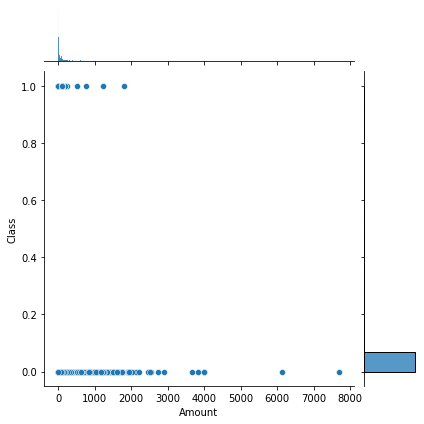

In [9]:
sns.jointplot(df['Amount'],df['Class'])

In [11]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()

df_small = df[['Time','Amount']]
df_small = pd.DataFrame(rbs.fit_transform(df_small))

df_small.columns = ['scaled_time','scaled_amount']
df = pd.concat([df,df_small],axis=1)

df.drop(['Time','Amount'],axis=1,inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,-0.646339,2.761777
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.646339,-0.273967
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,-0.646280,7.494008
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,-0.646280,2.222107
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.646221,1.116529


In [12]:
df['Class'].value_counts()

0.0    15862
1.0       73
Name: Class, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


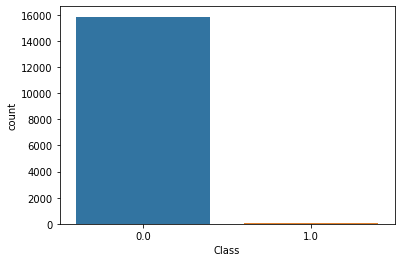

In [13]:
sns.countplot(df['Class'])

In [15]:
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

non_fraud = non_fraud.sample(frac=1)

non_fraud = non_fraud[:492]

new_df = pd.concat([non_fraud,fraud])
new_df = new_df.sample(frac=1)

In [16]:
new_df['Class'].value_counts()

0.0    492
1.0     73
Name: Class, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


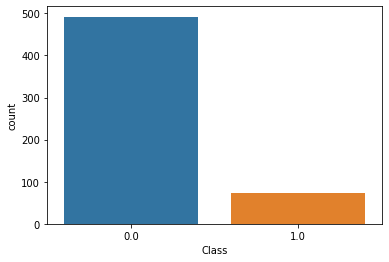

In [17]:
sns.countplot(new_df['Class'])

In [18]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        99
         1.0       1.00      0.86      0.92        14

    accuracy                           0.98       113
   macro avg       0.99      0.93      0.96       113
weighted avg       0.98      0.98      0.98       113




[[99  0]
 [ 2 12]]


accuracy is -->  98.23


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

pred = dt.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        99
         1.0       0.93      0.93      0.93        14

    accuracy                           0.98       113
   macro avg       0.96      0.96      0.96       113
weighted avg       0.98      0.98      0.98       113




[[98  1]
 [ 1 13]]


accuracy is -->  98.23


In [21]:
from sklearn.ensemble import RandomForestClassifier,IsolationForest

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

pred=rf.predict(X_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        99
         1.0       1.00      0.93      0.96        14

    accuracy                           0.99       113
   macro avg       0.99      0.96      0.98       113
weighted avg       0.99      0.99      0.99       113




[[99  0]
 [ 1 13]]


accuracy is -->  99.12
